# **Task1: Customer Segmentation for a Retail Store**


# Load and merge data

In [3]:
import pandas as pd

# Load datasets
orders = pd.read_csv('Orders.csv')
details = pd.read_csv('Details.csv')

# Merge datasets on Order ID
data = pd.merge(orders, details, on='Order ID')


# Data Cleaning and Preprocessing


In [4]:
# Handle missing values
data.dropna(inplace=True)

# Convert Order Date to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y') # Specify the correct format

# Feature Engineering
data['TotalSpend'] = data['Amount'] * data['Quantity']

# Aggregate data by Customer
customer_data = data.groupby('CustomerName').agg({
    'TotalSpend': 'sum',
    'Order ID': 'nunique',
    'Quantity': 'sum'
}).rename(columns={'Order ID': 'Frequency'})

# Calculate Average Purchase Value
customer_data['AvgPurchaseValue'] = customer_data['TotalSpend'] / customer_data['Frequency']

# Print the customer data
print(customer_data)

              TotalSpend  Frequency  Quantity  AvgPurchaseValue
CustomerName                                                   
Aakanksha            272          1         8        272.000000
Aarushi            22045          3        49       7348.333333
Aastha             14411          1        28      14411.000000
Aayush              1686          1        18       1686.000000
Aayushi             3533          3        18       1177.666667
...                  ...        ...       ...               ...
Wale                 310          1         8        310.000000
Yaanvi              2484          1        14       2484.000000
Yash                7327          1        21       7327.000000
Yogesh             29460          4        55       7365.000000
Yohann              3942          1         3       3942.000000

[336 rows x 4 columns]


# Exploratory Data Analysis

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Data Overview
print(data.info())
print(data.head())
print(data.describe())

# Step 2: Summary Statistics
customer_summary = customer_data.describe()
print(customer_summary)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      1500 non-null   object        
 1   Order Date    1500 non-null   datetime64[ns]
 2   CustomerName  1500 non-null   object        
 3   State         1500 non-null   object        
 4   City          1500 non-null   object        
 5   Amount        1500 non-null   int64         
 6   Profit        1500 non-null   int64         
 7   Quantity      1500 non-null   int64         
 8   Category      1500 non-null   object        
 9   Sub-Category  1500 non-null   object        
 10  PaymentMode   1500 non-null   object        
 11  TotalSpend    1500 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 140.8+ KB
None
  Order ID Order Date CustomerName          State     City  Amount  Profit  \
0  B-26055 2018-03-10    Harivansh  Utt

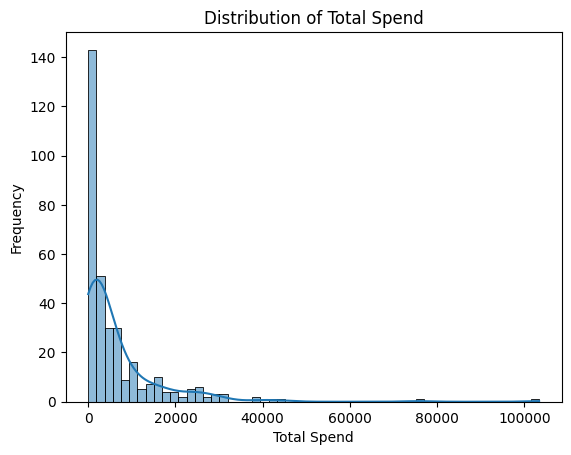

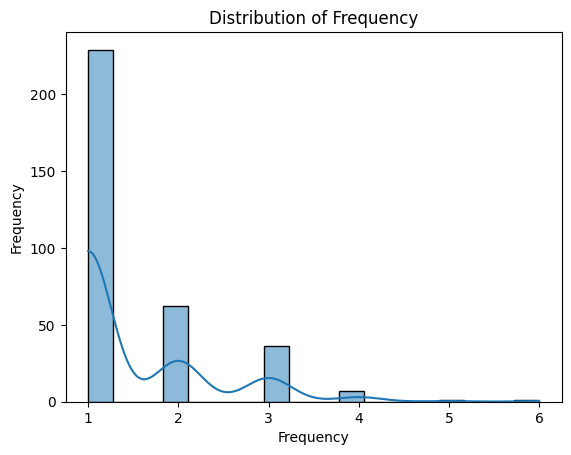

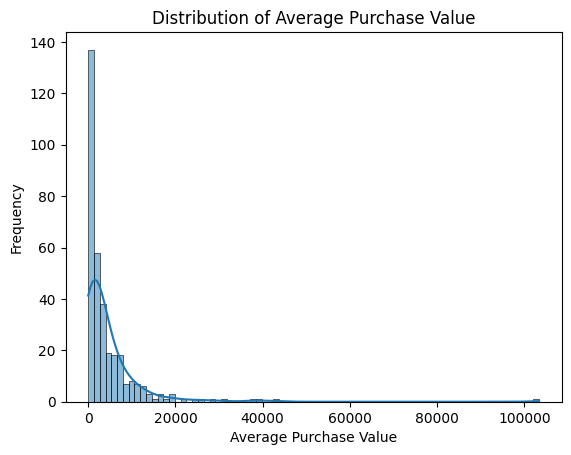

In [6]:
# Step 3: Distribution Analysis
sns.histplot(customer_data['TotalSpend'], kde=True)
plt.title('Distribution of Total Spend')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.show()

sns.histplot(customer_data['Frequency'], kde=True)
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.show()

sns.histplot(customer_data['AvgPurchaseValue'], kde=True)
plt.title('Distribution of Average Purchase Value')
plt.xlabel('Average Purchase Value')
plt.ylabel('Frequency')
plt.show()

                  TotalSpend  Frequency  Quantity  AvgPurchaseValue
TotalSpend          1.000000   0.314669  0.709867          0.892612
Frequency           0.314669   1.000000  0.604786         -0.006300
Quantity            0.709867   0.604786  1.000000          0.476856
AvgPurchaseValue    0.892612  -0.006300  0.476856          1.000000


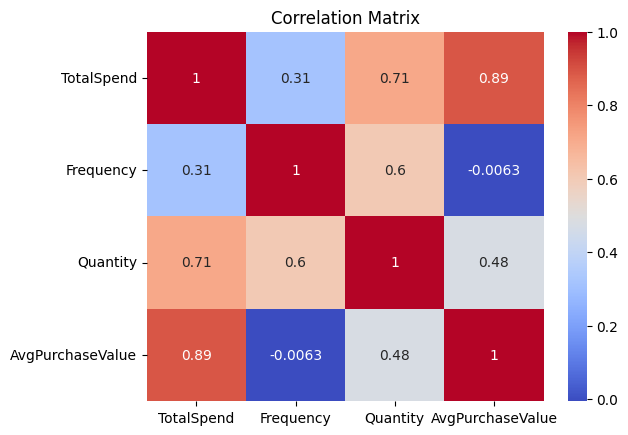

In [7]:
# Step 4: Correlation Analysis
correlation_matrix = customer_data.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


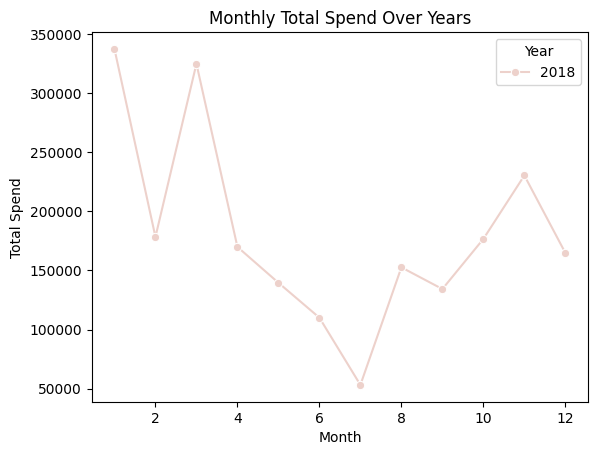

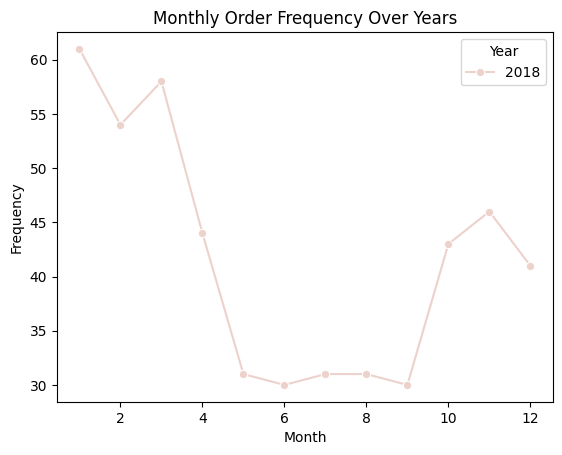

In [8]:
# Step 5: Time Series Analysis
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

monthly_spend = data.groupby(['Year', 'Month'])['TotalSpend'].sum().reset_index()
sns.lineplot(x='Month', y='TotalSpend', hue='Year', data=monthly_spend, marker='o')
plt.title('Monthly Total Spend Over Years')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.show()

monthly_frequency = data.groupby(['Year', 'Month'])['Order ID'].nunique().reset_index().rename(columns={'Order ID': 'Frequency'})
sns.lineplot(x='Month', y='Frequency', hue='Year', data=monthly_frequency, marker='o')
plt.title('Monthly Order Frequency Over Years')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

<ipython-input-9-9139722d08d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalSpend', y='Category', data=category_spend, palette='viridis')


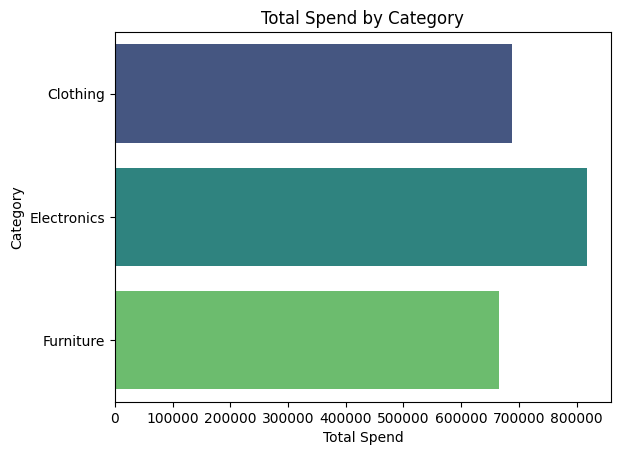

<ipython-input-9-9139722d08d6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalSpend', y='Sub-Category', data=subcategory_spend, palette='viridis')


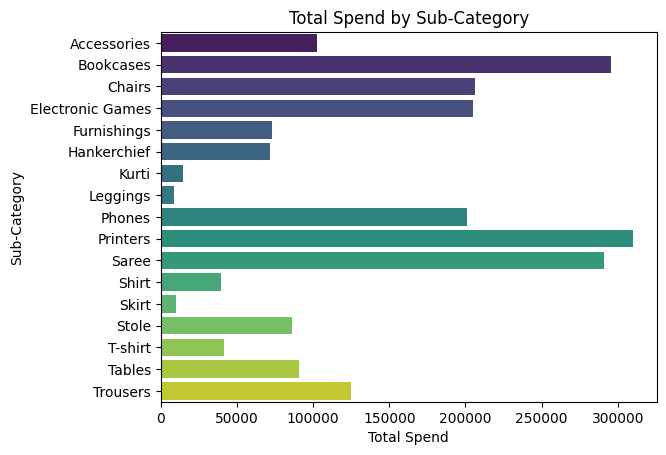

<ipython-input-9-9139722d08d6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalSpend', y='PaymentMode', data=payment_mode_spend, palette='viridis')


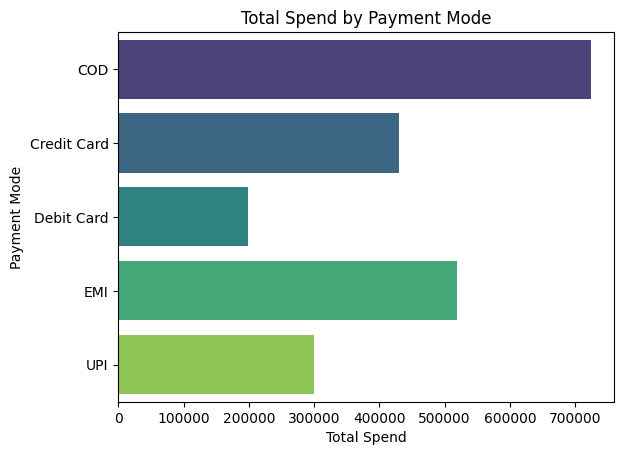

In [9]:
# Step 6: Category Analysis
category_spend = data.groupby('Category')['TotalSpend'].sum().reset_index()
sns.barplot(x='TotalSpend', y='Category', data=category_spend, palette='viridis')
plt.title('Total Spend by Category')
plt.xlabel('Total Spend')
plt.ylabel('Category')
plt.show()

subcategory_spend = data.groupby('Sub-Category')['TotalSpend'].sum().reset_index()
sns.barplot(x='TotalSpend', y='Sub-Category', data=subcategory_spend, palette='viridis')
plt.title('Total Spend by Sub-Category')
plt.xlabel('Total Spend')
plt.ylabel('Sub-Category')
plt.show()

payment_mode_spend = data.groupby('PaymentMode')['TotalSpend'].sum().reset_index()
sns.barplot(x='TotalSpend', y='PaymentMode', data=payment_mode_spend, palette='viridis')
plt.title('Total Spend by Payment Mode')
plt.xlabel('Total Spend')
plt.ylabel('Payment Mode')
plt.show()

# Clustering algorithms


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

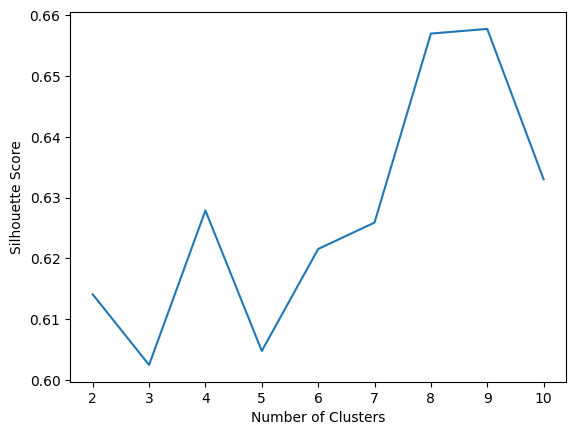

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(customer_data[['TotalSpend', 'Frequency', 'AvgPurchaseValue']])

# Determine optimal number of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores to find the elbow
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Apply K-means with optimal clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(data_scaled)


# Insights into the distribution and relationships of different features

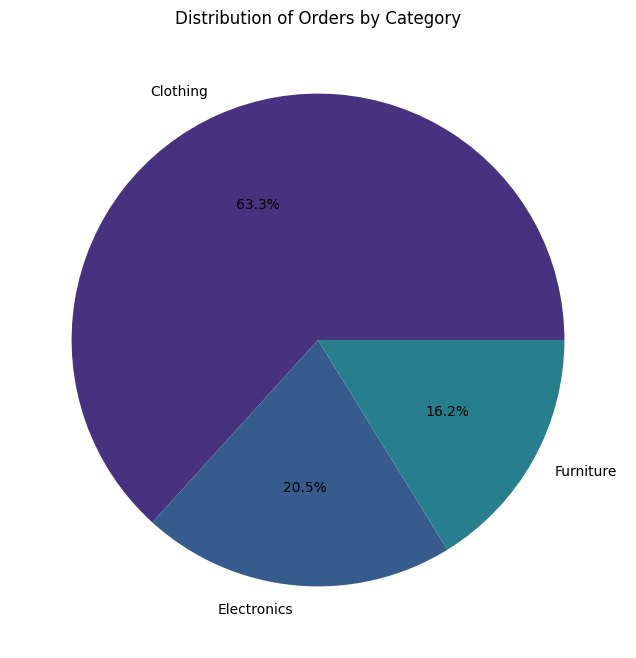

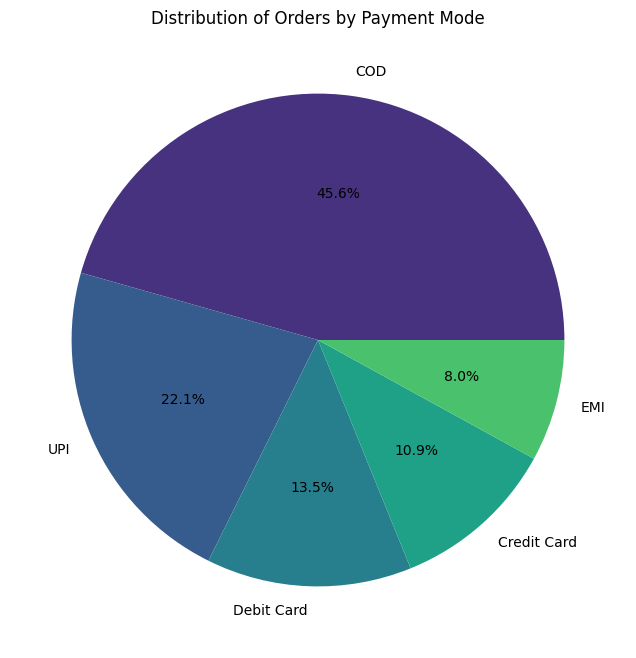

In [11]:
# Distribution of Orders by Category
category_counts = data['Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Distribution of Orders by Category')
plt.show()

# Distribution of Orders by Payment Mode
payment_mode_counts = data['PaymentMode'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(payment_mode_counts, labels=payment_mode_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Distribution of Orders by Payment Mode')
plt.show()


<ipython-input-12-664a8c7f70ca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='TotalSpend', data=data, palette='viridis')


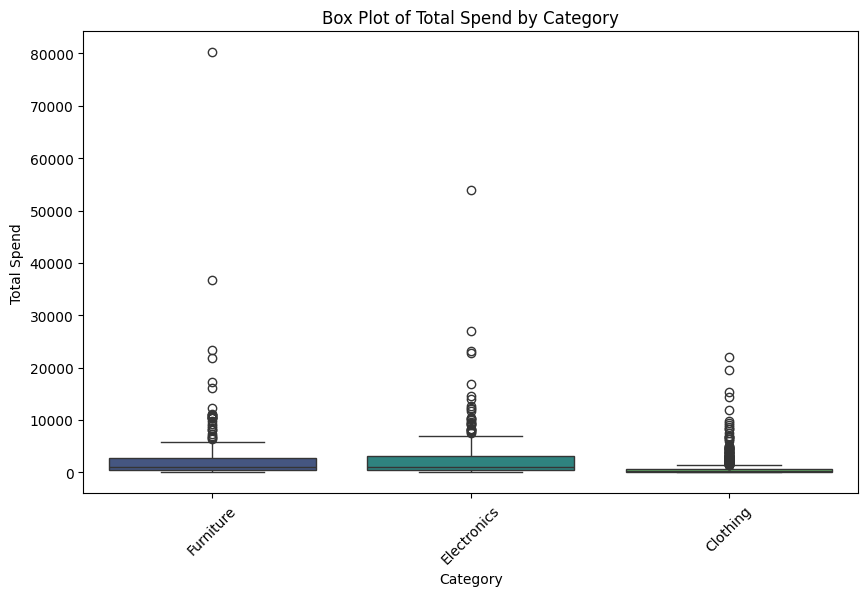

In [12]:
# Box Plot of Total Spend by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='TotalSpend', data=data, palette='viridis')
plt.title('Box Plot of Total Spend by Category')
plt.xlabel('Category')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.show()

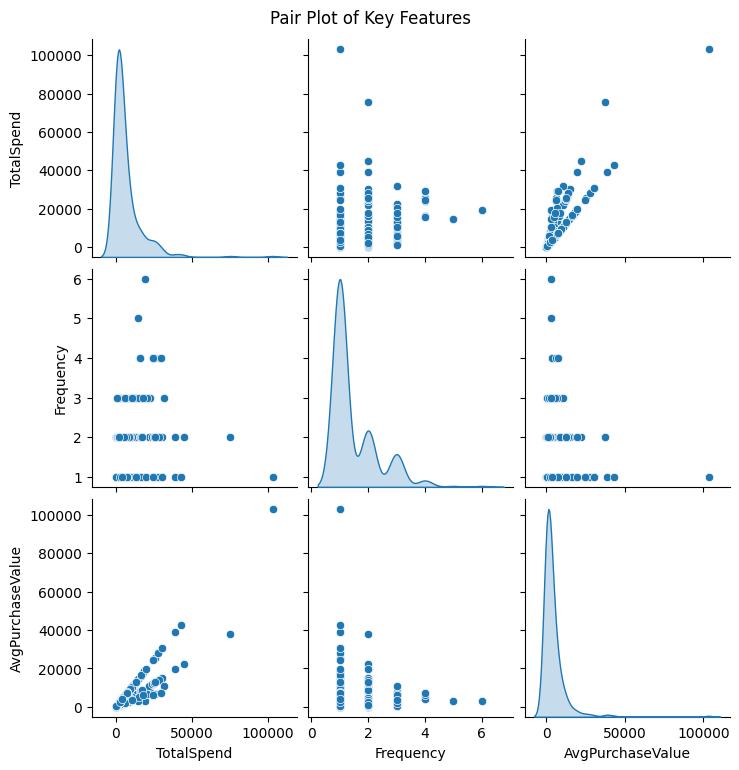

In [13]:
# Pair Plot of Key Features
sns.pairplot(customer_data[['TotalSpend', 'Frequency', 'AvgPurchaseValue']], diag_kind='kde')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

# Visualization of clustering algorithms

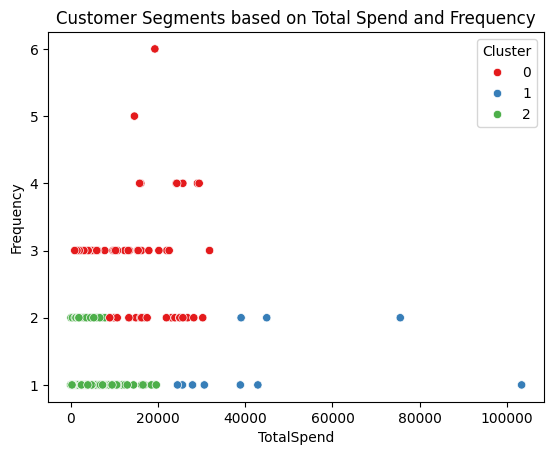

Cluster 2
         TotalSpend   Frequency    Quantity  AvgPurchaseValue  Cluster
count    261.000000  261.000000  261.000000        261.000000    261.0
mean    3161.325670    1.149425   11.363985       2887.350575      2.0
std     3763.740823    0.357192    9.434067       3707.828687      0.0
min       12.000000    1.000000    1.000000         12.000000      2.0
25%      480.000000    1.000000    4.000000        472.000000      2.0
50%     1556.000000    1.000000    8.000000       1476.000000      2.0
75%     4885.000000    1.000000   17.000000       3650.000000      2.0
max    19630.000000    2.000000   44.000000      19630.000000      2.0

Cluster 0
         TotalSpend  Frequency   Quantity  AvgPurchaseValue  Cluster
count     65.000000  65.000000  65.000000         65.000000     65.0
mean   13746.523077   2.876923  34.553846       5258.321538      0.0
std     8939.077600   0.780779  16.191270       3959.173342      0.0
min      932.000000   2.000000   8.000000        310.666667     

In [ ]:
# Visualize clusters
sns.scatterplot(x='TotalSpend', y='Frequency', hue='Cluster', data=customer_data, palette='Set1')
plt.title('Customer Segments based on Total Spend and Frequency')
plt.show()

# Profile the segments
for cluster in customer_data['Cluster'].unique():
    print(f"Cluster {cluster}")
    print(customer_data[customer_data['Cluster'] == cluster].describe())
    print()
